This notebook contains code to train a linear classifier on MNIST. At the end is a short exercise.

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

import scipy
import scipy.misc
import math
import PIL

import sys
import os
import re
import random
import glob

In [2]:
path = './images/'
res_path = './res_png/'

sess = None
def ResetSession():
    tf.reset_default_graph()
    global sess
    if sess is not None: sess.close()
    sess = tf.InteractiveSession()
ResetSession()

Import the dataset

In [3]:
# mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

In [4]:
NUM_CLASSES = 10
NUM_PIXELS = 400 * 400
TRAIN_STEPS = 100
BATCH_SIZE = 100
LEARNING_RATE = 0.5

MAX_VAL = 255

whole_set = glob.glob(path + '*.png')
whole_labels = []
whole_data = []
random.shuffle(whole_set)
for i in whole_set:
#     print (i)
    regex_res = re.search('X([0-9]*\.?[0-9]+)_Y([0-9]*\.?[0-9]+)(_X([0-9]*\.?[0-9]+)_Y([0-9]*\.?[0-9]+))?.png', i)
    
    append_label = np.zeros((NUM_CLASSES), dtype=np.float32)
    x_ind = (int(regex_res.group(1)) - 1) / 40
    np.put(append_label, x_ind, 1)
    whole_labels.append(append_label)
    
    img = scipy.misc.imread(i, flatten=True, mode='L').astype(np.float)
    img.shape = (NUM_PIXELS)
    img = img / MAX_VAL
#     print (np.amin(img), np.amax(img))
    whole_data.append(img)
#     break
print ("done")

done


In [5]:
# mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

# Placeholders for images and labels
# The first dimension is the batch size
# None means it can be of any length
# TensorFlow will infer it later
x = tf.placeholder(tf.float32, [None, NUM_PIXELS], name="pixels")
y_ = tf.placeholder(tf.float32, [None, NUM_CLASSES], name="labels")

# Define the model
W = tf.Variable(tf.zeros([NUM_PIXELS, NUM_CLASSES]), name="weights")
b = tf.Variable(tf.zeros([NUM_CLASSES]), name="biases")
y = tf.matmul(x, W) + b

# Write a summary of the graph (before we add the loss and optimizer)
# Which will add a bunch of nodes automatically

# Define loss and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)
tf.summary.scalar('loss', loss)

merged = tf.summary.merge_all()
sw = tf.summary.FileWriter('summaries/', graph=tf.get_default_graph())

# Initialize variables after the model is defined
sess.run(tf.global_variables_initializer())

# Train the model
for i in range(TRAIN_STEPS):
#     batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
    sum_writer , _ , loss_val = sess.run([merged, train_step, loss], feed_dict={x: whole_data, y_: whole_labels})
    sw.add_summary(sum_writer, i)
    if i % 10 == 0: print (i, "loss %f" % loss_val)
    break
Weight = sess.run(W)


0 loss 2.302582


(160000, 10)
(400, 400)


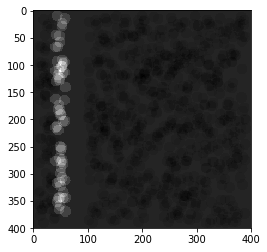

In [15]:
print (Weight.shape)
weight_0 = Weight[:, 1]
weight_0.shape = (400, 400)
print (weight_0.shape)
plt.imshow(weight_0, cmap=plt.cm.gray_r)

In [ ]:
np.set_printoptions(threshold='inf')
print (sess.run([W,b]))

In [ ]:
test_set = glob.glob(res_path + '*.png')
test_labels = []
test_data = []
random.shuffle(test_set)
for i in test_set:
    regex_res = re.search('X([0-9]*\.?[0-9]+)_Y([0-9]*\.?[0-9]+)(_X([0-9]*\.?[0-9]+)_Y([0-9]*\.?[0-9]+))?.png', i)
    
    append_label = np.zeros((NUM_CLASSES), dtype=np.float32)
    x_ind = (int(regex_res.group(1)) - 1) / 40
    np.put(append_label, x_ind, 1)
    test_labels.append(append_label)
    
    img = scipy.misc.imread(i, flatten=False, mode='RGBA').astype(np.float)
    img = img[:,:,3]
    img.shape = (NUM_PIXELS)
    img = img / MAX_VAL
#     print (np.amin(img), np.amax(img))
    test_data.append(img)
    break
print ("done")

In [ ]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("Accuracy %f" % sess.run(accuracy, feed_dict={x: test_data,
                                  y_: test_labels}))

In [ ]:
prediction = tf.argmax(y, 1)

def predict(idx):
    image = test_data[idx]
    return sess.run(prediction, feed_dict={x: [image]})

idx = 0
actual = np.argmax(test_labels[idx])
print ("Predicted: %d, Actual: %d" % (predict(idx), actual))
output = (test_data[idx].reshape((400,400)) * 255)
plt.imshow(output, cmap=plt.cm.gray_r)